<a href="https://colab.research.google.com/github/zjzsu2000/CMPE297_AdvanceDL_Project/blob/main/models/Final_result.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Activation, LeakyReLU, BatchNormalization, LSTM, Bidirectional, Input, Concatenate
from keras import backend as K
from keras.callbacks import TensorBoard
from keras.optimizers import Adam
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
option = pd.read_csv('/gdrive/My Drive/Data set/Option/WIX_call-options-black-scholes.csv')
lstm_option = pd.read_csv('/gdrive/My Drive/Data set/Option/underlying/call/WIX_underlying_call.csv')
model_lstm2 = load_model('/gdrive/My Drive/Data set/Option/lstm_call21_1.h5')
model_lstm = load_model('/gdrive/Shareddrives/CMPE297_49_project/models/model1_lstm_call_1.h5')
model2 = load_model('/gdrive/Shareddrives/CMPE297_49_project/models/model2_call21_all_4000.h5')
model3= load_model('/gdrive/Shareddrives/CMPE297_49_project/models/model3_call_sigma5_all_1024_4000.h5')

In [ ]:
lstm_option.tail()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,UnderlyingSymbol,UnderlyingPrice,Exchange,OptionSymbol,Blank,Expiration,DataDate,Strike,Last,Bid,Ask,Volume,OpenInterest,IV,Delta,Gamma,Theta,Vega,Alias,sigma_5,sigma_10,sigma_21,sigma_30,date_diff,treasury_rate,black_scholes_pred_21,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
51487,51487,103562,103562,WIX,148.52,*,WIX210115C00185000,NaN,01/15/2021,7/31/2019 04:00:00 PM,185.0,0.00,16.4,19.2,0.0,0.0,0.4199,0.4462,0.5241,-2.9859,71.0047,NaN,0.053055,0.037583,0.02923,0.027146,534,2.0,3.659971e-08,30.45,33.87,33.48,34.02,33.67,34.11,33.49,32.85,32.51,33.0,33.6,33.85,34.39,33.21,33.06,33.79,33.15,32.04,31.5,31.19,31.24
51488,51488,103564,103564,WIX,148.52,*,WIX210115C00190000,NaN,01/15/2021,7/31/2019 04:00:00 PM,190.0,15.33,15.0,17.8,0.0,4.0,0.4175,0.4239,0.5223,-2.9365,70.3513,NaN,0.053055,0.037583,0.02923,0.027146,534,2.0,3.771637e-10,30.45,33.87,33.48,34.02,33.67,34.11,33.49,32.85,32.51,33.0,33.6,33.85,34.39,33.21,33.06,33.79,33.15,32.04,31.5,31.19,31.24
51489,51489,103566,103566,WIX,148.52,*,WIX210115C00195000,NaN,01/15/2021,7/31/2019 04:00:00 PM,195.0,13.40,13.9,16.4,0.0,1.0,0.4139,0.4014,0.5201,-2.8700,69.4568,NaN,0.053055,0.037583,0.02923,0.027146,534,2.0,2.594149e-12,30.45,33.87,33.48,34.02,33.67,34.11,33.49,32.85,32.51,33.0,33.6,33.85,34.39,33.21,33.06,33.79,33.15,32.04,31.5,31.19,31.24
51490,51490,103568,103568,WIX,148.52,*,WIX210115C00200000,NaN,01/15/2021,7/31/2019 04:00:00 PM,200.0,11.80,12.9,15.2,0.0,16.0,0.4120,0.3805,0.5147,-2.8101,68.4214,NaN,0.053055,0.037583,0.02923,0.027146,534,2.0,1.226700e-14,30.45,33.87,33.48,34.02,33.67,34.11,33.49,32.85,32.51,33.0,33.6,33.85,34.39,33.21,33.06,33.79,33.15,32.04,31.5,31.19,31.24
51491,51491,103570,103570,WIX,148.52,*,WIX210115C00210000,NaN,01/15/2021,7/31/2019 04:00:00 PM,210.0,12.00,10.1,13.2,2.0,38.0,0.4110,0.3430,0.4980,-2.6967,66.0350,NaN,0.053055,0.037583,0.02923,0.027146,534,2.0,9.948072e-20,30.45,33.87,33.48,34.02,33.67,34.11,33.49,32.85,32.51,33.0,33.6,33.85,34.39,33.21,33.06,33.79,33.15,32.04,31.5,31.19,31.24


In [ ]:
model_lstm2.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 21, 1)]      0                                            
__________________________________________________________________________________________________
sequential_1 (Sequential)       (None, 8)            1952        input_3[0][0]                    
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 4)]          0                                            
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 12)           0           sequential_1[0][0]               
                                                                 input_4[0][0]         

In [ ]:
lstm_test = lstm_option[lstm_option['OptionSymbol']=='WIX200117C00060000']

In [ ]:
lstm_test

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,UnderlyingSymbol,UnderlyingPrice,Exchange,OptionSymbol,Blank,Expiration,DataDate,Strike,Last,Bid,Ask,Volume,OpenInterest,IV,Delta,Gamma,Theta,Vega,Alias,sigma_5,sigma_10,sigma_21,sigma_30,date_diff,treasury_rate,black_scholes_pred_21,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
75,75,150,150,WIX,57.95,*,WIX200117C00060000,NaN,01/17/2020,1/2/2018 04:00:00 PM,60.0,14.20,13.7,17.8,0.0,6.0,0.5721,0.6452,0.7858,-1.1968,30.8156,NaN,NaN,NaN,NaN,NaN,745,1.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,159,318,318,WIX,58.30,*,WIX200117C00060000,NaN,01/17/2020,1/3/2018 04:00:00 PM,60.0,14.20,14.2,16.9,0.0,6.0,0.5363,0.6376,0.8401,-1.1388,31.2121,NaN,NaN,NaN,NaN,NaN,744,1.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243,243,486,486,WIX,62.10,*,WIX200117C00060000,NaN,01/17/2020,1/4/2018 04:00:00 PM,60.0,14.20,16.2,20.3,0.0,6.0,0.5653,0.6744,0.7191,-1.2287,31.9109,NaN,NaN,NaN,NaN,NaN,743,1.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327,327,654,654,WIX,60.65,*,WIX200117C00060000,NaN,01/17/2020,1/5/2018 04:00:00 PM,60.0,14.20,15.8,17.9,0.0,6.0,0.5206,0.6527,0.8204,-1.1355,31.9402,NaN,NaN,NaN,NaN,NaN,742,1.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
411,411,822,822,WIX,61.05,*,WIX200117C00060000,NaN,01/17/2020,1/8/2018 04:00:00 PM,60.0,14.20,15.4,18.4,0.0,6.0,0.5292,0.6577,0.7991,-1.1574,31.9105,NaN,0.033379,NaN,NaN,NaN,739,1.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50772,50772,102132,102132,WIX,145.47,*,WIX200117C00060000,NaN,01/17/2020,7/25/2019 04:00:00 PM,60.0,86.04,84.3,88.4,0.0,32.0,0.9604,0.9528,0.1016,-2.9216,9.9435,NaN,0.015078,0.019606,0.018441,0.022449,176,2.08,86.068768,33.67,34.11,33.49,32.85,32.51,33.00,33.60,33.85,34.39,33.21,33.06,33.79,33.15,32.04,31.50,31.19,31.24,31.20,30.37,30.74,29.92
50931,50931,102450,102450,WIX,149.14,*,WIX200117C00060000,NaN,01/17/2020,7/26/2019 04:00:00 PM,60.0,86.04,87.7,91.8,0.0,32.0,0.9524,0.9574,0.0922,-2.7565,9.3524,NaN,0.015076,0.015556,0.017786,0.021421,175,2.10,89.741079,34.02,33.67,34.11,33.49,32.85,32.51,33.00,33.60,33.85,34.39,33.21,33.06,33.79,33.15,32.04,31.50,31.19,31.24,31.20,30.37,30.74
51090,51090,102768,102768,WIX,147.42,*,WIX200117C00060000,NaN,01/17/2020,7/29/2019 04:00:00 PM,60.0,86.04,85.7,89.8,0.0,32.0,0.9224,0.9598,0.0928,-2.5631,8.7597,NaN,0.017021,0.015576,0.018002,0.020211,172,2.10,88.010825,33.48,34.02,33.67,34.11,33.49,32.85,32.51,33.00,33.60,33.85,34.39,33.21,33.06,33.79,33.15,32.04,31.50,31.19,31.24,31.20,30.37
51249,51249,103086,103086,WIX,148.01,*,WIX200117C00060000,NaN,01/17/2020,7/30/2019 04:00:00 PM,60.0,86.04,86.2,90.5,0.0,32.0,0.9405,0.9587,0.0928,-2.6758,8.9544,NaN,0.014728,0.015906,0.017308,0.018911,171,2.07,88.589056,33.87,33.48,34.02,33.67,34.11,33.49,32.85,32.51,33.00,33.60,33.85,34.39,33.21,33.06,33.79,33.15,32.04,31.50,31.19,31.24,31.20


In [ ]:
lstm_test = lstm_test[['UnderlyingPrice','Strike','Bid','Ask','sigma_21','date_diff','treasury_rate','1','2','3','4','5','6','7','8','9','10'
                      ,'11','12','13','14','15','16','17','18','19','20','21']]

In [ ]:
lstm_test = lstm_test.dropna()

In [ ]:
lstm_test

,UnderlyingPrice,Strike,Bid,Ask,sigma_21,date_diff,treasury_rate,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
1731,61.05,60.0,16.2,18.4,0.029875,716,2.14,13.735,12.865,13.320,12.950,12.410,12.710,12.94,12.64,12.59,12.47,12.18,11.91,12.02,12.1404,11.9600,11.8200,12.2800,11.8800,12.12,11.55,10.98
1812,61.75,60.0,16.7,18.7,0.030058,715,2.16,13.250,13.735,12.865,13.320,12.950,12.410,12.71,12.94,12.64,12.59,12.47,12.18,11.91,12.0200,12.1404,11.9600,11.8200,12.2800,11.88,12.12,11.55
1893,61.45,60.0,16.3,18.3,0.031937,714,2.15,12.450,13.250,13.735,12.865,13.320,12.950,12.41,12.71,12.94,12.64,12.59,12.47,12.18,11.9100,12.0200,12.1404,11.9600,11.8200,12.28,11.88,12.12
1974,60.00,60.0,15.5,18.8,0.035571,711,2.08,11.570,12.450,13.250,13.735,12.865,13.320,12.95,12.41,12.71,12.94,12.64,12.59,12.47,12.1800,11.9100,12.0200,12.1404,11.9600,11.82,12.28,11.88
2055,60.15,60.0,15.6,17.6,0.034691,710,2.10,11.640,11.570,12.450,13.250,13.735,12.865,13.32,12.95,12.41,12.71,12.94,12.64,12.59,12.4700,12.1800,11.9100,12.0200,12.1404,11.96,11.82,12.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50772,145.47,60.0,84.3,88.4,0.018441,176,2.08,33.670,34.110,33.490,32.850,32.510,33.000,33.60,33.85,34.39,33.21,33.06,33.79,33.15,32.0400,31.5000,31.1900,31.2400,31.2000,30.37,30.74,29.92
50931,149.14,60.0,87.7,91.8,0.017786,175,2.10,34.020,33.670,34.110,33.490,32.850,32.510,33.00,33.60,33.85,34.39,33.21,33.06,33.79,33.1500,32.0400,31.5000,31.1900,31.2400,31.20,30.37,30.74
51090,147.42,60.0,85.7,89.8,0.018002,172,2.10,33.480,34.020,33.670,34.110,33.490,32.850,32.51,33.00,33.60,33.85,34.39,33.21,33.06,33.7900,33.1500,32.0400,31.5000,31.1900,31.24,31.20,30.37
51249,148.01,60.0,86.2,90.5,0.017308,171,2.07,33.870,33.480,34.020,33.670,34.110,33.490,32.85,32.51,33.00,33.60,33.85,34.39,33.21,33.0600,33.7900,33.1500,32.0400,31.5000,31.19,31.24,31.20


In [ ]:
#test_lstm_f = lstm_test[['UnderlyingPrice','Strike','sigma_21','date_diff','treasury_rate']]
test_lstm_x = lstm_test.drop(['Bid','sigma_21','Ask'], axis=1).values
#[['1','2','3','4','5','6','7','8','9','10'
 #                     ,'11','12','13','14','15','16','17','18','19','20','21']]
test_lstm_y = (lstm_test.Bid + lstm_test.Ask) /2

In [ ]:
N_TIMESTEPS = 21
test_lstm_x = [test_lstm_x[:, -N_TIMESTEPS:].reshape(test_lstm_x.shape[0], N_TIMESTEPS, 1), test_lstm_x[:, :4]]

In [ ]:
test_lstm_x[1]

array([[ 61.05,  60.  , 716.  ,   2.14],
       [ 61.75,  60.  , 715.  ,   2.16],
       [ 61.45,  60.  , 714.  ,   2.15],
       ...,
       [147.42,  60.  , 172.  ,   2.1 ],
       [148.01,  60.  , 171.  ,   2.07],
       [148.52,  60.  , 170.  ,   2.1 ]])

In [ ]:
model_lstm.evaluate([test_lstm_x,test_lstm_f],test_lstm_y,batch_size=1024)

1/1 [==============================] - 0s 1ms/step - loss: 1.7065


1.7064849138259888

In [ ]:
lstmpre = model_lstm.predict(test_lstm_x)

In [ ]:
test_lstm_y

1731     17.30
1812     17.70
1893     17.30
1974     17.15
2055     16.60
         ...  
50772    86.35
50931    89.75
51090    87.75
51249    88.35
51408    89.15
Length: 374, dtype: float64

In [ ]:
lstmpre

array([[13.921378  ],
       [13.604851  ],
       [13.23929   ],
       [13.702546  ],
       [13.602226  ],
       [13.618467  ],
       [14.279745  ],
       [13.824292  ],
       [12.659948  ],
       [11.911948  ],
       [ 9.794283  ],
       [ 8.266235  ],
       [ 7.7554493 ],
       [ 8.11447   ],
       [ 6.9576406 ],
       [ 8.633503  ],
       [ 7.6611724 ],
       [ 7.821476  ],
       [ 8.121382  ],
       [ 8.669017  ],
       [ 8.953257  ],
       [ 7.961344  ],
       [ 6.647985  ],
       [ 6.572985  ],
       [ 5.795946  ],
       [ 5.591967  ],
       [ 5.577964  ],
       [ 5.3878694 ],
       [ 5.7623744 ],
       [ 5.3707757 ],
       [ 5.618757  ],
       [ 5.233835  ],
       [ 5.4607477 ],
       [ 4.89441   ],
       [ 4.76436   ],
       [ 5.2655773 ],
       [ 6.671829  ],
       [ 5.572788  ],
       [ 7.494155  ],
       [ 8.436413  ],
       [ 7.4917297 ],
       [ 8.338816  ],
       [ 7.251299  ],
       [ 6.5273685 ],
       [ 6.3322144 ],
       [ 6

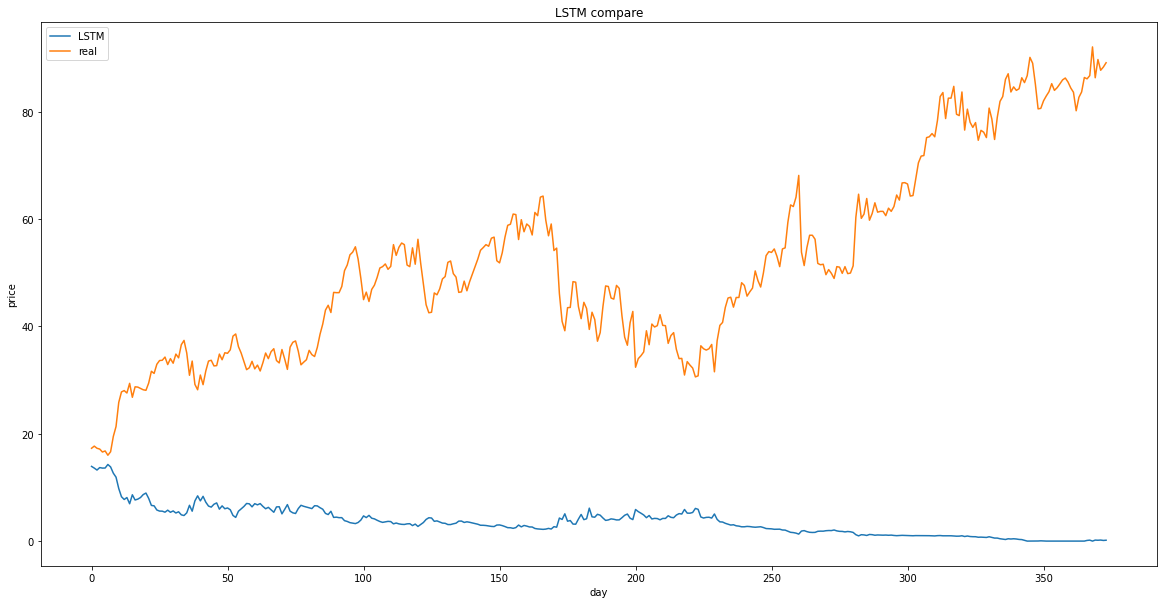

In [ ]:
from matplotlib import pyplot as plt4
plt4.figure(figsize=(20, 10))
plt4.ylabel('price')
plt4.xlabel('day')
plt4.title('LSTM compare')
plt4.plot(lstmpre,label = 'LSTM')  
plt4.plot(test_lstm_y.values, label = 'real')
plt4.legend()

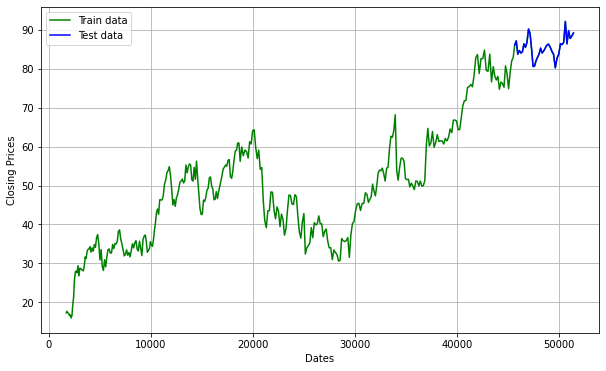

In [ ]:
#split data into train and training set
from matplotlib import pyplot as plt5
train_data, test_data = test_lstm_y[3:int(len(test_lstm_y)*0.9)], test_lstm_y[int(len(test_lstm_y)*0.9):]
plt5.figure(figsize=(10,6))
plt5.grid(True)
plt5.xlabel('Dates')
plt5.ylabel('Closing Prices')
plt5.plot(test_lstm_y, 'green', label='Train data')
plt5.plot(test_data, 'blue', label='Test data')
plt5.legend()

In [ ]:
from pmdarima.arima import auto_arima
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1579.097, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1580.218, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1580.007, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1579.024, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1579.810, Time=0.19 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.429 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  333
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -788.512
Date:                Mon, 07 Dec 2020   AIC                           1579.024
Time:                        09:58:35   BIC                           1582.829
Sample:                             0   HQIC                          1580.541
                                - 333                                       

In [ ]:

model = ARIMA(train_data, order=(3, 1, 2))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecastin

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  332
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -783.900
Method:                       css-mle   S.D. of innovations              2.565
Date:                Mon, 07 Dec 2020   AIC                           1581.800
Time:                        10:00:35   BIC                           1608.436
Sample:                             1   HQIC                          1592.423
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1912      0.099      1.924      0.054      -0.004       0.386
ar.L1.D.y      0.2129      0.332      0.642      0.521      -0.437       0.863
ar.L2.D.y      0.4945      0.251      1.968      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


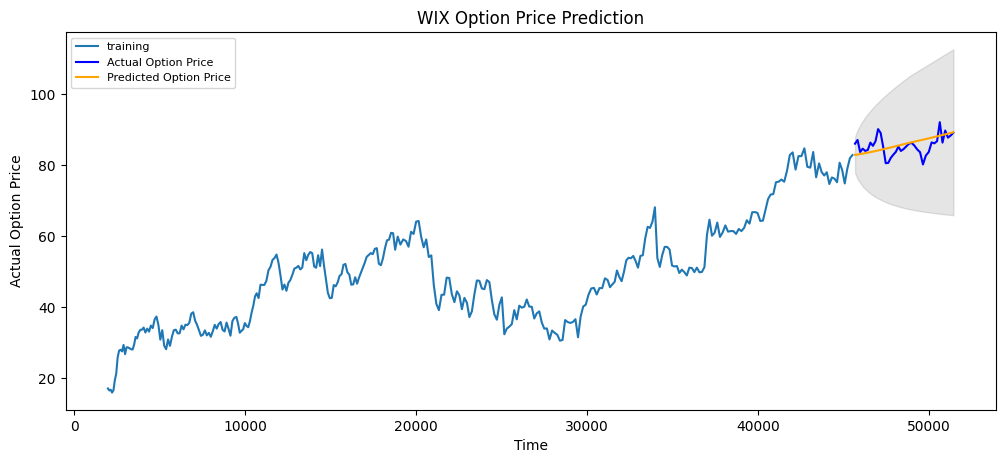

In [ ]:
# Forecast
fc, se, conf = fitted.forecast(38, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Option Price')
plt.plot(fc_series, color = 'orange',label='Predicted Option Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('WIX Option Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Option Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               2400      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 400)               160400    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 400)               160400    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 400)               1

In [ ]:
option.head()

,Unnamed: 0,Unnamed: 0.1,UnderlyingSymbol,UnderlyingPrice,Exchange,OptionSymbol,Blank,Expiration,DataDate,Strike,Last,Bid,Ask,Volume,OpenInterest,IV,Delta,Gamma,Theta,Vega,Alias,sigma_5,sigma_10,sigma_21,sigma_30,date_diff,treasury_rate,black_scholes_pred_21
0,0,0,WIX,57.95,*,WIX180119C00040000,NaN,01/19/2018,1/2/2018 04:00:00 PM,40.0,17.90,17.00,20.30,0.0,12.0,2.0474,0.8556,0.8885,-17.1540,2.8402,NaN,NaN,NaN,NaN,NaN,17,1.29,NaN
1,2,2,WIX,57.95,*,WIX180119C00045000,NaN,01/19/2018,1/2/2018 04:00:00 PM,45.0,14.82,11.70,15.40,0.0,14.0,1.6263,0.8151,1.3130,-15.9985,3.3340,NaN,NaN,NaN,NaN,NaN,17,1.29,NaN
2,4,4,WIX,57.95,*,WIX180119C00050000,NaN,01/19/2018,1/2/2018 04:00:00 PM,50.0,9.20,7.70,9.60,0.0,24.0,0.9858,0.7884,2.3499,-10.5303,3.6168,NaN,NaN,NaN,NaN,NaN,17,1.29,NaN
3,6,6,WIX,57.95,*,WIX180119C00055000,NaN,01/19/2018,1/2/2018 04:00:00 PM,55.0,3.61,3.60,4.30,0.0,314.0,0.5262,0.6978,5.3048,-6.7828,4.3585,NaN,NaN,NaN,NaN,NaN,17,1.29,NaN
4,8,8,WIX,57.95,*,WIX180119C00060000,NaN,01/19/2018,1/2/2018 04:00:00 PM,60.0,1.45,1.15,1.65,181.0,726.0,0.5014,0.3950,6.1458,-7.1221,4.8110,NaN,NaN,NaN,NaN,NaN,17,1.29,NaN


In [ ]:
option.OptionSymbol.value_counts()

WIX200117C00075000    394
WIX200117C00085000    394
WIX200117C00100000    394
WIX200117C00040000    394
WIX200117C00065000    394
                     ... 
WIX190920C00165000      8
WIX190920C00185000      8
WIX190920C00160000      8
WIX190920C00180000      8
WIX180316C00095000      5
Name: OptionSymbol, Length: 531, dtype: int64

In [ ]:
test = option[option['OptionSymbol']=='WIX200117C00060000']

In [ ]:
test = test[['UnderlyingPrice','Strike','Bid','Ask','sigma_21','date_diff','treasury_rate']]

In [ ]:
test=test.dropna()

In [ ]:
test

,UnderlyingPrice,Strike,Bid,Ask,sigma_21,date_diff,treasury_rate
1731,61.05,60.0,16.2,18.4,0.029875,716,2.14
1812,61.75,60.0,16.7,18.7,0.030058,715,2.16
1893,61.45,60.0,16.3,18.3,0.031937,714,2.15
1974,60.00,60.0,15.5,18.8,0.035571,711,2.08
2055,60.15,60.0,15.6,17.6,0.034691,710,2.10
...,...,...,...,...,...,...,...
50772,145.47,60.0,84.3,88.4,0.018441,176,2.08
50931,149.14,60.0,87.7,91.8,0.017786,175,2.10
51090,147.42,60.0,85.7,89.8,0.018002,172,2.10
51249,148.01,60.0,86.2,90.5,0.017308,171,2.07


In [ ]:
test_x = test[['UnderlyingPrice','Strike','sigma_21','date_diff','treasury_rate']]
test_y = (test.Bid + test.Ask) /2

In [ ]:
model2.evaluate(test_x,test_y,batch_size=1024)

1/1 [==============================] - 0s 2ms/step - loss: 0.9988


0.998781681060791

In [ ]:
pred= model2.predict(test_x)

In [ ]:
len(pred)

374

In [ ]:
len(test_y)

374

In [ ]:
test_y

1731     17.30
1812     17.70
1893     17.30
1974     17.15
2055     16.60
         ...  
50772    86.35
50931    89.75
51090    87.75
51249    88.35
51408    89.15
Length: 374, dtype: float64

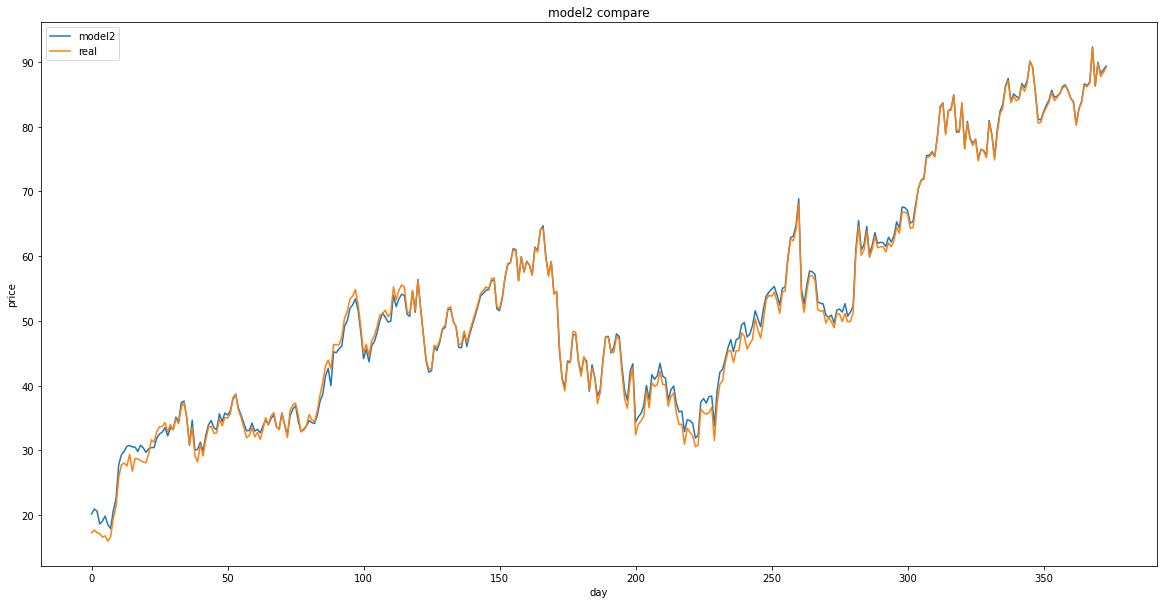

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20, 10))
plt.ylabel('price')
plt.xlabel('day')
plt.title('model2 compare')
plt.plot(pred,label = 'model2')  
plt.plot(test_y.values, label = 'real')
plt.legend()

In [ ]:
model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               2400      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 400)               160400    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 400)               160400    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 400)               1

In [ ]:
pre3=model3.predict(test_x)

In [ ]:
len(pre3[:,0])

374

In [ ]:
test_y3 = test[['Bid','Ask']]

In [ ]:
test_yb = test_y3.Bid.values
test_ya = test_y3.Ask.values

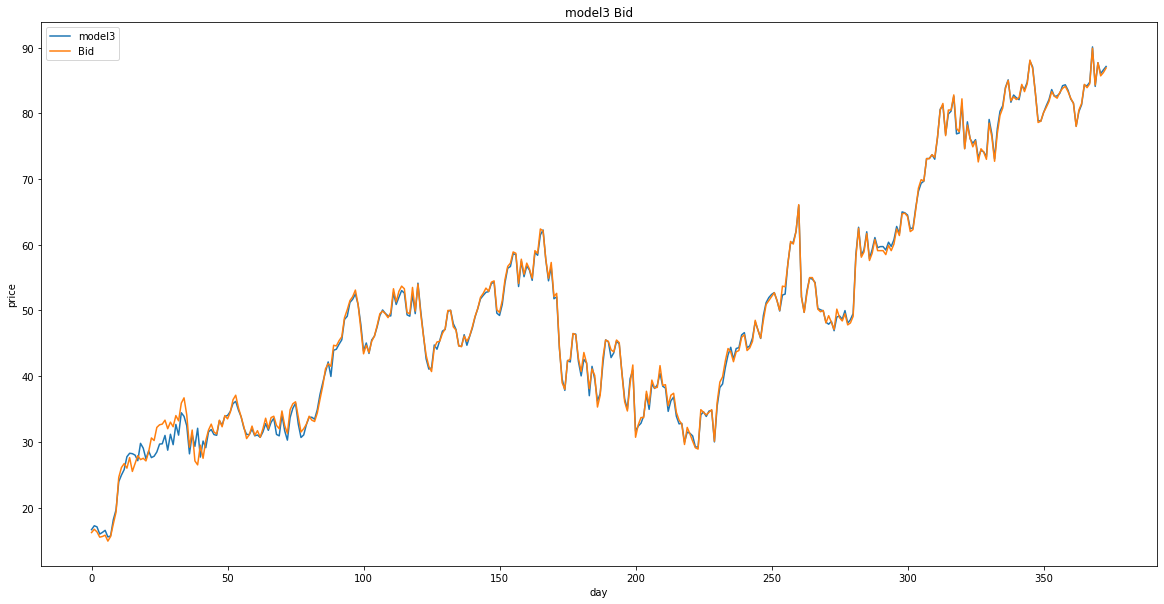

In [ ]:
from matplotlib import pyplot as plt2
plt2.figure(figsize=(20, 10))
plt2.ylabel('price')
plt2.xlabel('day')
plt2.title('model3 Bid')
plt2.plot(pre3[:,0],label = 'model3') 
plt2.plot(test_yb, label = 'Bid')
plt2.legend() 

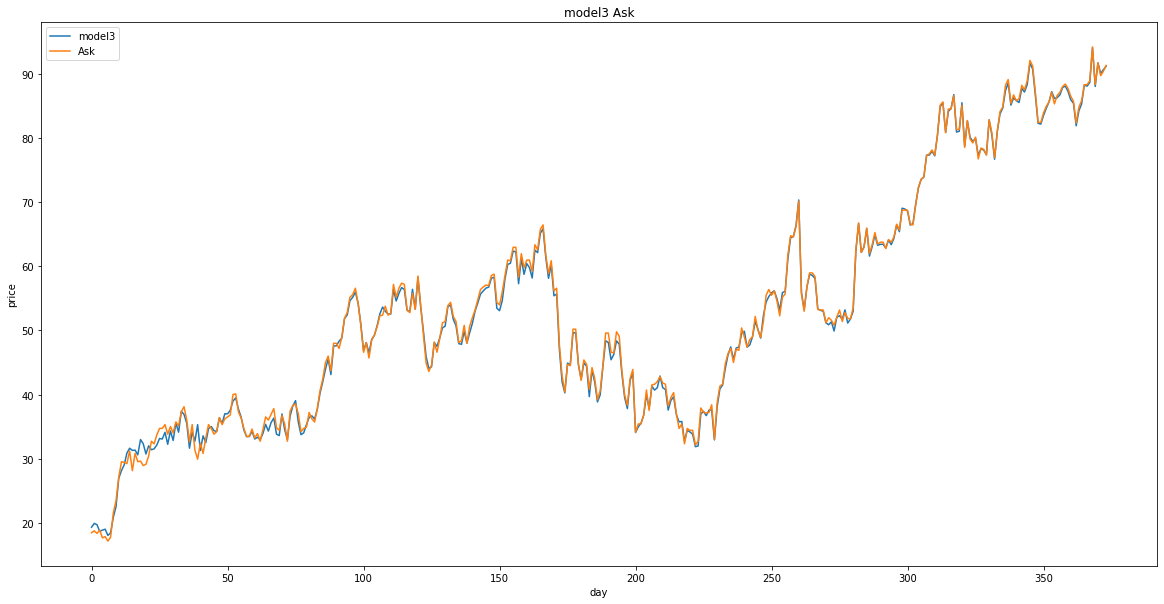

In [ ]:
from matplotlib import pyplot as plt3
plt3.figure(figsize=(20, 10))
plt3.ylabel('price')
plt3.xlabel('day')
plt3.title('model3 Ask')
plt3.plot(pre3[:,1],label = 'model3') 
plt3.plot(test_ya, label = 'Ask')
plt3.legend() 